# Mean-Variance Optimization: Modern Portfolio Theory

## Introduction

Mean-Variance Optimization (MVO) is the foundational framework of Modern Portfolio Theory, introduced by Harry Markowitz in 1952. This theory revolutionized investment management by formalizing the trade-off between risk and return, and demonstrating how diversification can improve a portfolio's risk-adjusted performance.

## Theoretical Framework

### Portfolio Return

For a portfolio of $n$ assets with weights $\mathbf{w} = (w_1, w_2, \ldots, w_n)^T$, the expected portfolio return is:

$$\mu_p = \mathbf{w}^T \boldsymbol{\mu} = \sum_{i=1}^{n} w_i \mu_i$$

where $\boldsymbol{\mu} = (\mu_1, \mu_2, \ldots, \mu_n)^T$ is the vector of expected asset returns.

### Portfolio Variance

The portfolio variance (risk) is given by:

$$\sigma_p^2 = \mathbf{w}^T \boldsymbol{\Sigma} \mathbf{w} = \sum_{i=1}^{n} \sum_{j=1}^{n} w_i w_j \sigma_{ij}$$

where $\boldsymbol{\Sigma}$ is the $n \times n$ covariance matrix of asset returns.

### The Optimization Problem

The MVO framework seeks to minimize portfolio variance for a given target return $\mu^*$:

$$\min_{\mathbf{w}} \quad \frac{1}{2} \mathbf{w}^T \boldsymbol{\Sigma} \mathbf{w}$$

subject to:
$$\mathbf{w}^T \boldsymbol{\mu} = \mu^*$$
$$\mathbf{w}^T \mathbf{1} = 1$$

where $\mathbf{1}$ is a vector of ones (full investment constraint).

### Lagrangian Solution

Using Lagrange multipliers $\lambda$ and $\gamma$, we form:

$$\mathcal{L} = \frac{1}{2} \mathbf{w}^T \boldsymbol{\Sigma} \mathbf{w} - \lambda(\mathbf{w}^T \boldsymbol{\mu} - \mu^*) - \gamma(\mathbf{w}^T \mathbf{1} - 1)$$

Taking the first-order condition $\frac{\partial \mathcal{L}}{\partial \mathbf{w}} = 0$:

$$\boldsymbol{\Sigma} \mathbf{w} = \lambda \boldsymbol{\mu} + \gamma \mathbf{1}$$

The optimal weights are:

$$\mathbf{w}^* = \boldsymbol{\Sigma}^{-1}(\lambda \boldsymbol{\mu} + \gamma \mathbf{1})$$

### The Efficient Frontier

The efficient frontier is the set of portfolios that offer the highest expected return for each level of risk. It forms a hyperbola in mean-standard deviation space, with the equation:

$$\sigma_p^2 = \frac{C\mu_p^2 - 2B\mu_p + A}{AC - B^2}$$

where:
- $A = \mathbf{1}^T \boldsymbol{\Sigma}^{-1} \mathbf{1}$
- $B = \mathbf{1}^T \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu}$
- $C = \boldsymbol{\mu}^T \boldsymbol{\Sigma}^{-1} \boldsymbol{\mu}$

### Global Minimum Variance Portfolio

The portfolio with the lowest possible variance has weights:

$$\mathbf{w}_{GMV} = \frac{\boldsymbol{\Sigma}^{-1} \mathbf{1}}{\mathbf{1}^T \boldsymbol{\Sigma}^{-1} \mathbf{1}}$$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Set random seed for reproducibility
np.random.seed(42)

# Define asset universe
assets = ['US Equities', 'Int\'l Equities', 'Bonds', 'Real Estate', 'Commodities']
n_assets = len(assets)

# Expected annual returns (realistic estimates)
expected_returns = np.array([0.10, 0.09, 0.04, 0.08, 0.05])

# Annual volatilities
volatilities = np.array([0.18, 0.22, 0.06, 0.15, 0.20])

# Correlation matrix (realistic asset correlations)
correlation_matrix = np.array([
    [1.00, 0.75, 0.10, 0.50, 0.30],
    [0.75, 1.00, 0.05, 0.45, 0.35],
    [0.10, 0.05, 1.00, 0.20, -0.10],
    [0.50, 0.45, 0.20, 1.00, 0.25],
    [0.30, 0.35, -0.10, 0.25, 1.00]
])

# Convert to covariance matrix: Σ = diag(σ) × ρ × diag(σ)
cov_matrix = np.outer(volatilities, volatilities) * correlation_matrix

print("Expected Returns:")
for i, asset in enumerate(assets):
    print(f"  {asset}: {expected_returns[i]*100:.1f}%")

print("\nCovariance Matrix:")
print(pd.DataFrame(cov_matrix, index=assets, columns=assets).round(4))

Expected Returns:
  US Equities: 10.0%
  Int'l Equities: 9.0%
  Bonds: 4.0%
  Real Estate: 8.0%
  Commodities: 5.0%

Covariance Matrix:
                US Equities  Int'l Equities   Bonds  Real Estate  Commodities
US Equities          0.0324          0.0297  0.0011       0.0135       0.0108
Int'l Equities       0.0297          0.0484  0.0007       0.0148       0.0154
Bonds                0.0011          0.0007  0.0036       0.0018      -0.0012
Real Estate          0.0135          0.0148  0.0018       0.0225       0.0075
Commodities          0.0108          0.0154 -0.0012       0.0075       0.0400


## Implementation of Mean-Variance Optimization

We now implement functions to compute portfolio statistics and perform optimization.

In [2]:
def portfolio_return(weights, expected_returns):
    """Calculate expected portfolio return."""
    return np.dot(weights, expected_returns)

def portfolio_volatility(weights, cov_matrix):
    """Calculate portfolio standard deviation."""
    return np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

def portfolio_sharpe(weights, expected_returns, cov_matrix, risk_free_rate=0.02):
    """Calculate portfolio Sharpe ratio."""
    ret = portfolio_return(weights, expected_returns)
    vol = portfolio_volatility(weights, cov_matrix)
    return (ret - risk_free_rate) / vol

def minimize_volatility(target_return, expected_returns, cov_matrix):
    """Find minimum volatility portfolio for a target return."""
    n = len(expected_returns)
    
    # Objective: minimize volatility
    def objective(weights):
        return portfolio_volatility(weights, cov_matrix)
    
    # Constraints
    constraints = [
        {'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # weights sum to 1
        {'type': 'eq', 'fun': lambda w: portfolio_return(w, expected_returns) - target_return}
    ]
    
    # Bounds: allow short selling (weights can be negative)
    bounds = tuple((-0.5, 1.5) for _ in range(n))
    
    # Initial guess: equal weights
    initial_weights = np.ones(n) / n
    
    result = minimize(objective, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)
    
    return result.x

def global_minimum_variance(expected_returns, cov_matrix):
    """Find the global minimum variance portfolio."""
    n = len(expected_returns)
    
    def objective(weights):
        return portfolio_volatility(weights, cov_matrix)
    
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = tuple((-0.5, 1.5) for _ in range(n))
    initial_weights = np.ones(n) / n
    
    result = minimize(objective, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)
    
    return result.x

def maximum_sharpe_ratio(expected_returns, cov_matrix, risk_free_rate=0.02):
    """Find the maximum Sharpe ratio portfolio (tangency portfolio)."""
    n = len(expected_returns)
    
    def neg_sharpe(weights):
        return -portfolio_sharpe(weights, expected_returns, cov_matrix, risk_free_rate)
    
    constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1}]
    bounds = tuple((-0.5, 1.5) for _ in range(n))
    initial_weights = np.ones(n) / n
    
    result = minimize(neg_sharpe, initial_weights, method='SLSQP',
                     bounds=bounds, constraints=constraints)
    
    return result.x

## Computing the Efficient Frontier

We generate the efficient frontier by solving the optimization problem for various target returns.

In [3]:
# Find key portfolios
gmv_weights = global_minimum_variance(expected_returns, cov_matrix)
msr_weights = maximum_sharpe_ratio(expected_returns, cov_matrix)

# Calculate GMV portfolio metrics
gmv_return = portfolio_return(gmv_weights, expected_returns)
gmv_vol = portfolio_volatility(gmv_weights, cov_matrix)

# Calculate MSR portfolio metrics
msr_return = portfolio_return(msr_weights, expected_returns)
msr_vol = portfolio_volatility(msr_weights, cov_matrix)
msr_sharpe = portfolio_sharpe(msr_weights, expected_returns, cov_matrix)

print("Global Minimum Variance Portfolio:")
print(f"  Expected Return: {gmv_return*100:.2f}%")
print(f"  Volatility: {gmv_vol*100:.2f}%")
print(f"  Weights:")
for i, asset in enumerate(assets):
    print(f"    {asset}: {gmv_weights[i]*100:.1f}%")

print("\nMaximum Sharpe Ratio Portfolio (Tangency):")
print(f"  Expected Return: {msr_return*100:.2f}%")
print(f"  Volatility: {msr_vol*100:.2f}%")
print(f"  Sharpe Ratio: {msr_sharpe:.3f}")
print(f"  Weights:")
for i, asset in enumerate(assets):
    print(f"    {asset}: {msr_weights[i]*100:.1f}%")

Global Minimum Variance Portfolio:
  Expected Return: 4.33%
  Volatility: 5.53%
  Weights:
    US Equities: 2.8%
    Int'l Equities: -0.1%
    Bonds: 86.2%
    Real Estate: 1.9%
    Commodities: 9.2%

Maximum Sharpe Ratio Portfolio (Tangency):
  Expected Return: 6.05%
  Volatility: 7.28%
  Sharpe Ratio: 0.556
  Weights:
    US Equities: 26.2%
    Int'l Equities: -3.8%
    Bonds: 58.6%
    Real Estate: 16.0%
    Commodities: 3.0%


In [4]:
# Generate efficient frontier
target_returns = np.linspace(gmv_return, max(expected_returns), 50)
efficient_volatilities = []
efficient_weights = []

for target in target_returns:
    weights = minimize_volatility(target, expected_returns, cov_matrix)
    vol = portfolio_volatility(weights, cov_matrix)
    efficient_volatilities.append(vol)
    efficient_weights.append(weights)

efficient_volatilities = np.array(efficient_volatilities)

# Generate random portfolios for comparison
n_random = 5000
random_returns = []
random_volatilities = []
random_sharpes = []

for _ in range(n_random):
    # Generate random weights that sum to 1
    weights = np.random.dirichlet(np.ones(n_assets))
    ret = portfolio_return(weights, expected_returns)
    vol = portfolio_volatility(weights, cov_matrix)
    sharpe = portfolio_sharpe(weights, expected_returns, cov_matrix)
    
    random_returns.append(ret)
    random_volatilities.append(vol)
    random_sharpes.append(sharpe)

random_returns = np.array(random_returns)
random_volatilities = np.array(random_volatilities)
random_sharpes = np.array(random_sharpes)

## Visualization of the Efficient Frontier

We now visualize the efficient frontier along with random portfolios and key optimal portfolios.

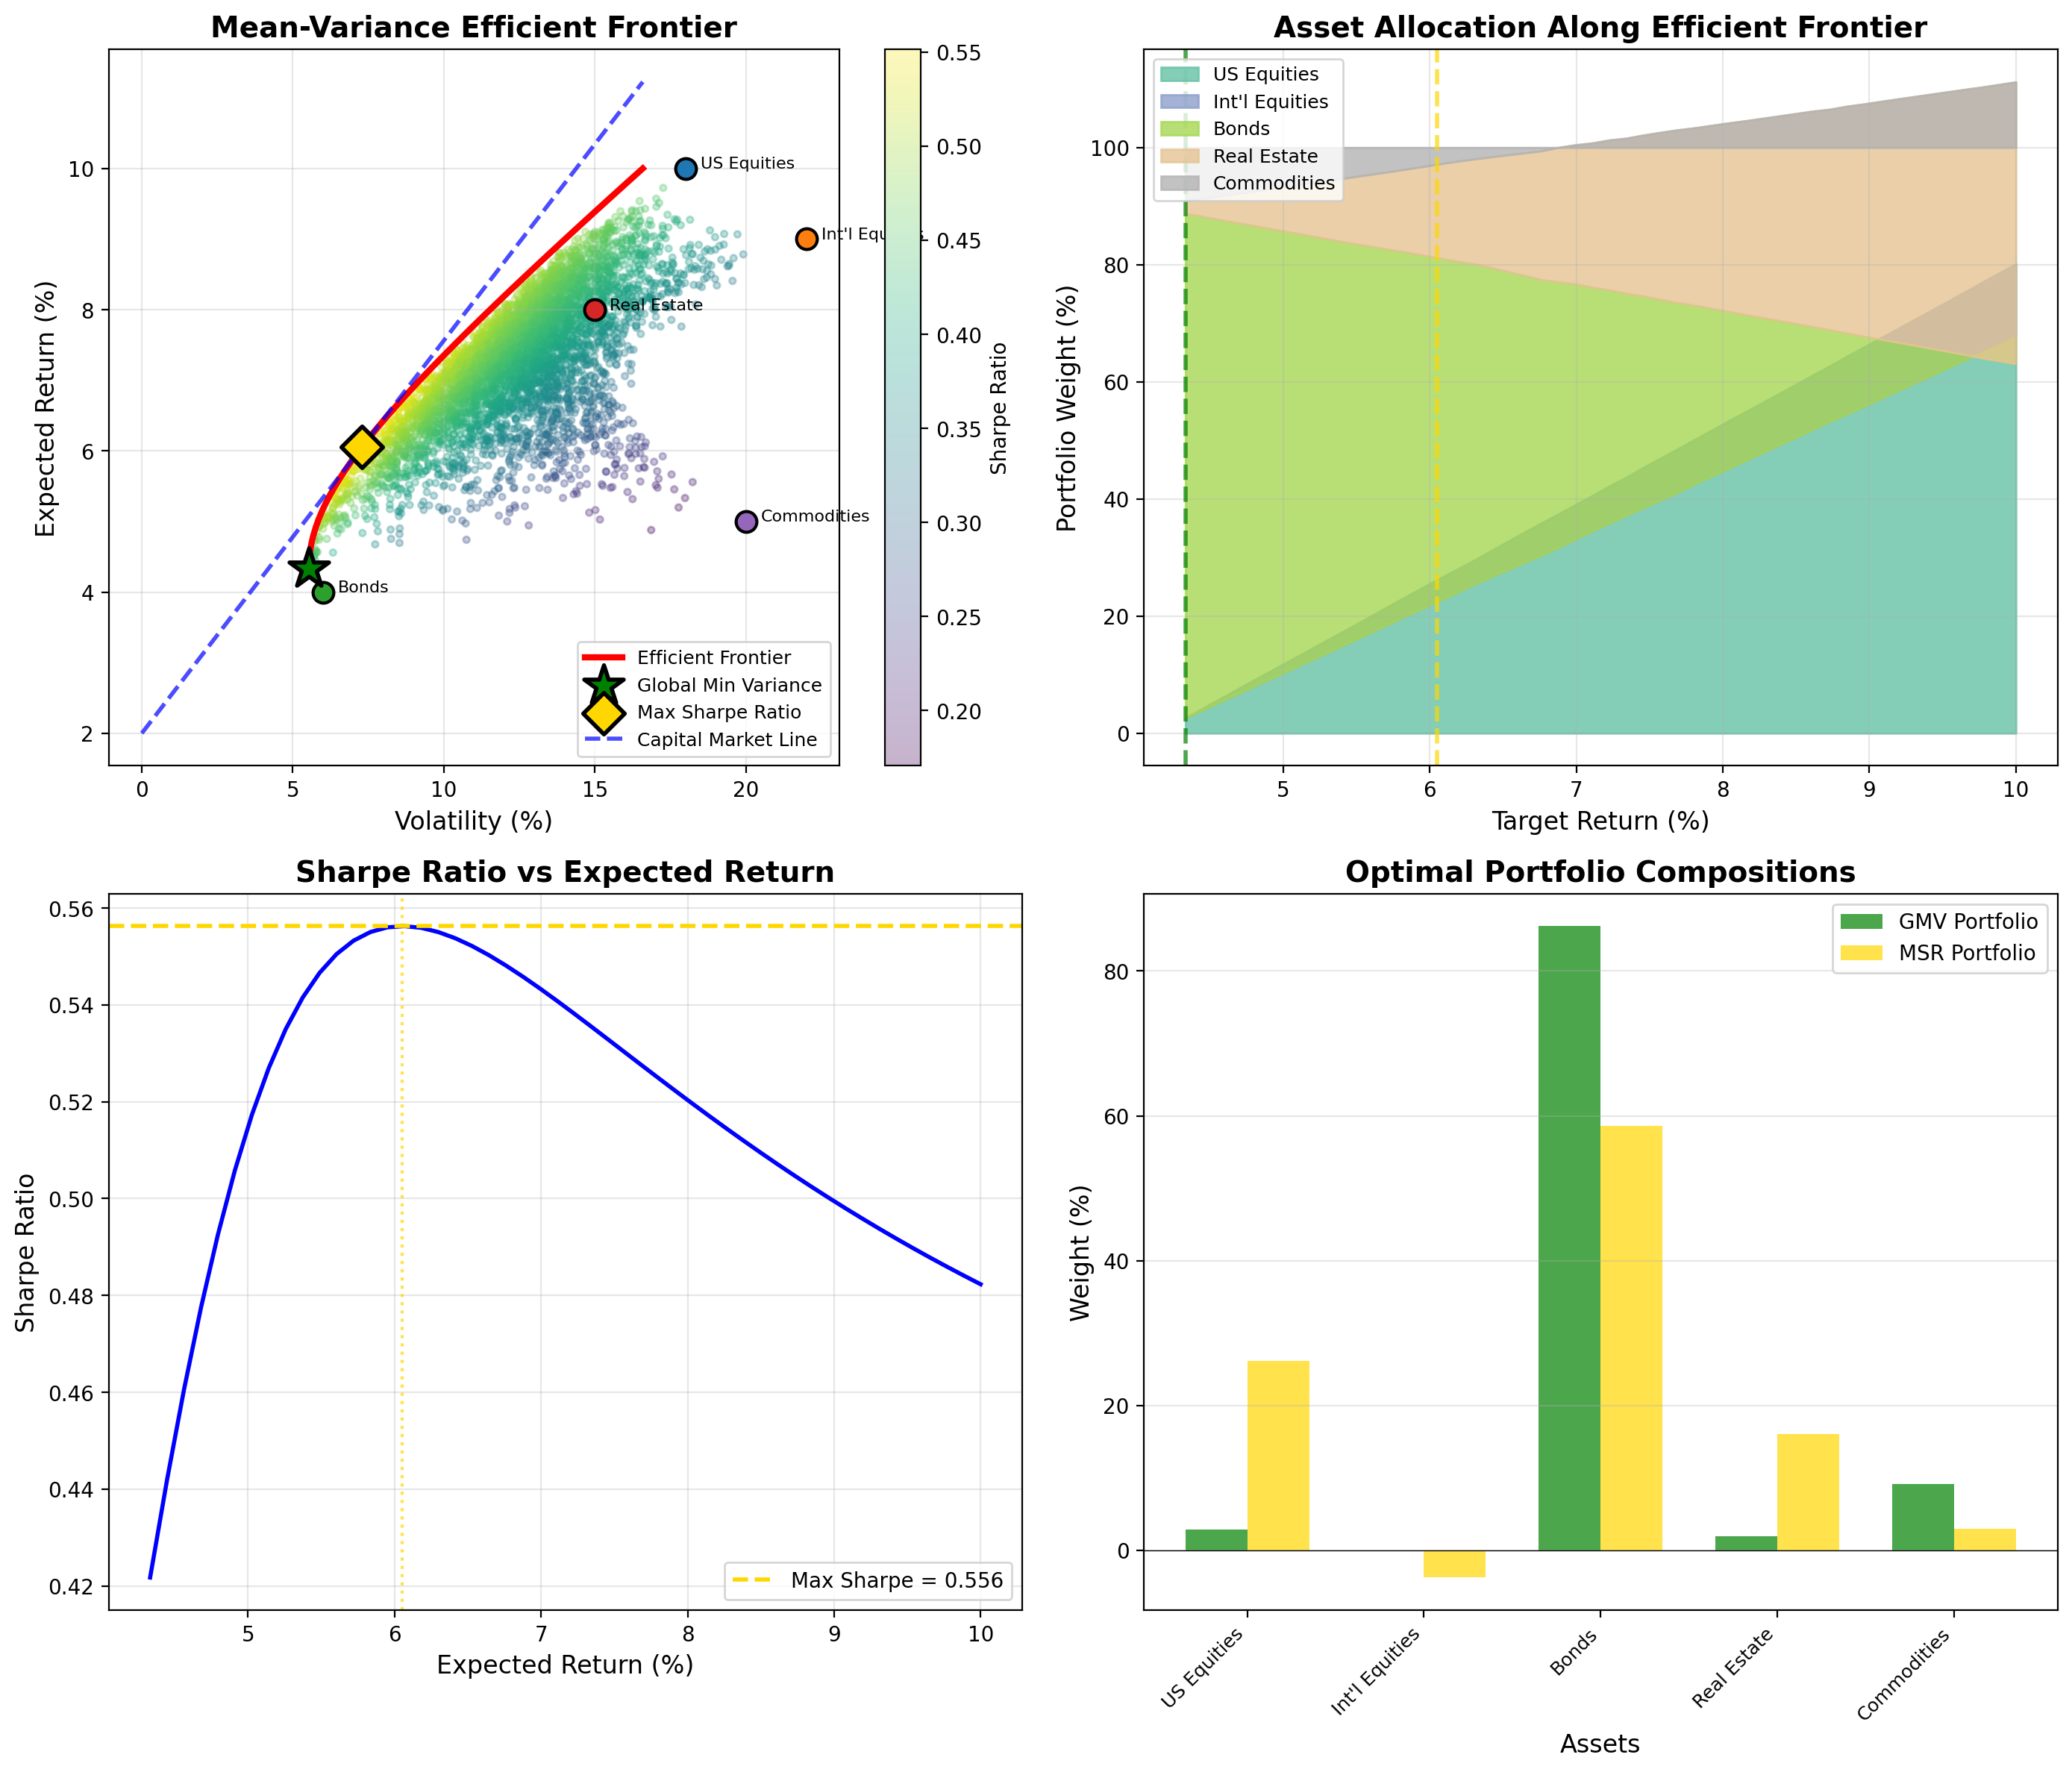


Visualization saved to 'plot.png'


In [5]:
# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Plot 1: Efficient Frontier with Random Portfolios
ax1 = axes[0, 0]
scatter = ax1.scatter(random_volatilities * 100, random_returns * 100, 
                      c=random_sharpes, cmap='viridis', alpha=0.3, s=10)
ax1.plot(efficient_volatilities * 100, target_returns * 100, 
         'r-', linewidth=3, label='Efficient Frontier')
ax1.scatter(gmv_vol * 100, gmv_return * 100, 
            marker='*', s=400, c='green', edgecolors='black', 
            linewidth=2, label='Global Min Variance', zorder=5)
ax1.scatter(msr_vol * 100, msr_return * 100, 
            marker='D', s=200, c='gold', edgecolors='black', 
            linewidth=2, label='Max Sharpe Ratio', zorder=5)

# Plot individual assets
for i, asset in enumerate(assets):
    ax1.scatter(volatilities[i] * 100, expected_returns[i] * 100, 
                marker='o', s=100, edgecolors='black', linewidth=1.5, zorder=4)
    ax1.annotate(asset, (volatilities[i] * 100 + 0.5, expected_returns[i] * 100),
                fontsize=8)

# Capital Market Line (CML)
risk_free = 0.02
cml_x = np.linspace(0, max(efficient_volatilities) * 100, 100)
cml_y = risk_free * 100 + msr_sharpe * cml_x
ax1.plot(cml_x, cml_y, 'b--', linewidth=2, alpha=0.7, label='Capital Market Line')

ax1.set_xlabel('Volatility (%)', fontsize=12)
ax1.set_ylabel('Expected Return (%)', fontsize=12)
ax1.set_title('Mean-Variance Efficient Frontier', fontsize=14, fontweight='bold')
ax1.legend(loc='lower right', fontsize=9)
ax1.grid(True, alpha=0.3)
cbar = plt.colorbar(scatter, ax=ax1)
cbar.set_label('Sharpe Ratio', fontsize=10)

# Plot 2: Portfolio Weights Along Efficient Frontier
ax2 = axes[0, 1]
efficient_weights_array = np.array(efficient_weights)
colors = plt.cm.Set2(np.linspace(0, 1, n_assets))

for i, asset in enumerate(assets):
    ax2.fill_between(target_returns * 100, 
                     np.sum(efficient_weights_array[:, :i], axis=1) * 100,
                     np.sum(efficient_weights_array[:, :i+1], axis=1) * 100,
                     label=asset, color=colors[i], alpha=0.8)

ax2.axvline(x=gmv_return * 100, color='green', linestyle='--', linewidth=2, alpha=0.7)
ax2.axvline(x=msr_return * 100, color='gold', linestyle='--', linewidth=2, alpha=0.7)
ax2.set_xlabel('Target Return (%)', fontsize=12)
ax2.set_ylabel('Portfolio Weight (%)', fontsize=12)
ax2.set_title('Asset Allocation Along Efficient Frontier', fontsize=14, fontweight='bold')
ax2.legend(loc='upper left', fontsize=9)
ax2.grid(True, alpha=0.3)

# Plot 3: Risk-Return Trade-off
ax3 = axes[1, 0]
sharpe_ratios = (target_returns - risk_free) / efficient_volatilities
ax3.plot(target_returns * 100, sharpe_ratios, 'b-', linewidth=2)
ax3.axhline(y=msr_sharpe, color='gold', linestyle='--', linewidth=2, 
            label=f'Max Sharpe = {msr_sharpe:.3f}')
ax3.axvline(x=msr_return * 100, color='gold', linestyle=':', linewidth=1.5, alpha=0.7)
ax3.set_xlabel('Expected Return (%)', fontsize=12)
ax3.set_ylabel('Sharpe Ratio', fontsize=12)
ax3.set_title('Sharpe Ratio vs Expected Return', fontsize=14, fontweight='bold')
ax3.legend(loc='lower right', fontsize=10)
ax3.grid(True, alpha=0.3)

# Plot 4: Optimal Portfolio Compositions (Bar Chart)
ax4 = axes[1, 1]
x = np.arange(n_assets)
width = 0.35

bars1 = ax4.bar(x - width/2, gmv_weights * 100, width, 
                label='GMV Portfolio', color='green', alpha=0.7)
bars2 = ax4.bar(x + width/2, msr_weights * 100, width, 
                label='MSR Portfolio', color='gold', alpha=0.7)

ax4.set_xlabel('Assets', fontsize=12)
ax4.set_ylabel('Weight (%)', fontsize=12)
ax4.set_title('Optimal Portfolio Compositions', fontsize=14, fontweight='bold')
ax4.set_xticks(x)
ax4.set_xticklabels(assets, rotation=45, ha='right', fontsize=9)
ax4.legend(loc='upper right', fontsize=10)
ax4.grid(True, alpha=0.3, axis='y')
ax4.axhline(y=0, color='black', linewidth=0.5)

plt.tight_layout()
plt.savefig('mean_variance_optimization_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nVisualization saved to 'plot.png'")

## Analytical Solution Verification

We verify our numerical results using the closed-form analytical solution for the efficient frontier.

In [6]:
# Analytical solution for efficient frontier parameters
ones = np.ones(n_assets)
cov_inv = np.linalg.inv(cov_matrix)

# Compute key scalars
A = ones.T @ cov_inv @ ones
B = ones.T @ cov_inv @ expected_returns
C = expected_returns.T @ cov_inv @ expected_returns
D = A * C - B**2

print("Analytical Solution Parameters:")
print(f"  A = {A:.6f}")
print(f"  B = {B:.6f}")
print(f"  C = {C:.6f}")
print(f"  D = A*C - B² = {D:.6f}")

# Analytical GMV portfolio
gmv_weights_analytical = (cov_inv @ ones) / A
gmv_return_analytical = B / A
gmv_var_analytical = 1 / A

print(f"\nAnalytical GMV Portfolio:")
print(f"  Expected Return: {gmv_return_analytical*100:.2f}%")
print(f"  Volatility: {np.sqrt(gmv_var_analytical)*100:.2f}%")

# Compare with numerical solution
print(f"\nNumerical GMV Portfolio:")
print(f"  Expected Return: {gmv_return*100:.2f}%")
print(f"  Volatility: {gmv_vol*100:.2f}%")

# Efficient frontier equation verification
test_returns = np.linspace(gmv_return_analytical, max(expected_returns), 10)
analytical_variances = (C * test_returns**2 - 2*B*test_returns + A) / D

print(f"\nEfficient Frontier Verification (sample points):")
print(f"{'Return (%)':>12} {'Analytical σ (%)':>18} {'Numerical σ (%)':>18}")
for i, ret in enumerate(test_returns):
    num_weights = minimize_volatility(ret, expected_returns, cov_matrix)
    num_vol = portfolio_volatility(num_weights, cov_matrix)
    ana_vol = np.sqrt(analytical_variances[i])
    print(f"{ret*100:>12.2f} {ana_vol*100:>18.4f} {num_vol*100:>18.4f}")

Analytical Solution Parameters:
  A = 327.029664
  B = 14.173326
  C = 0.745541
  D = A*C - B² = 42.930708

Analytical GMV Portfolio:
  Expected Return: 4.33%
  Volatility: 5.53%

Numerical GMV Portfolio:
  Expected Return: 4.33%
  Volatility: 5.53%

Efficient Frontier Verification (sample points):
  Return (%)   Analytical σ (%)    Numerical σ (%)
        4.33           275.4820             5.5298
        4.96           275.4067             5.7963
        5.59           275.3314             6.5311
        6.22           275.2562             7.5995
        6.85           275.1809             8.8818
        7.48           275.1057            10.2985
        8.11           275.0304            11.8013
        8.74           274.9552            13.3612
        9.37           274.8799            14.9602
       10.00           274.8047            16.5872


## Summary and Key Insights

### Main Findings

1. **Diversification Benefit**: The efficient frontier demonstrates that optimal portfolio construction yields better risk-adjusted returns than any individual asset. The Global Minimum Variance portfolio achieves lower volatility than the least risky individual asset (Bonds at 6%).

2. **Risk-Return Trade-off**: Moving along the efficient frontier from GMV to higher returns requires accepting disproportionately higher risk. The Sharpe ratio initially increases and then decreases, indicating diminishing risk-adjusted returns.

3. **Optimal Allocation**: The Maximum Sharpe Ratio portfolio represents the optimal risky portfolio when combined with risk-free lending/borrowing. The Capital Market Line (CML) shows all efficient portfolios when a risk-free asset is available.

### Limitations of Mean-Variance Optimization

- **Estimation Error**: Results are highly sensitive to input estimates (expected returns, covariances)
- **Single Period**: The model is static and doesn't account for dynamic rebalancing
- **Normal Distribution Assumption**: Assumes returns are normally distributed, ignoring fat tails
- **No Transaction Costs**: Ignores trading costs and market impact

### Extensions

Modern portfolio theory has evolved to address these limitations through:
- Robust optimization
- Black-Litterman model
- Risk parity approaches
- Factor-based investing